In [2]:
#import all libaryes
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
#import all libaryes
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)
climate = Base.classes


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [11]:
#we take a year ago, the date 2017-08-23 and take away 365 days
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)


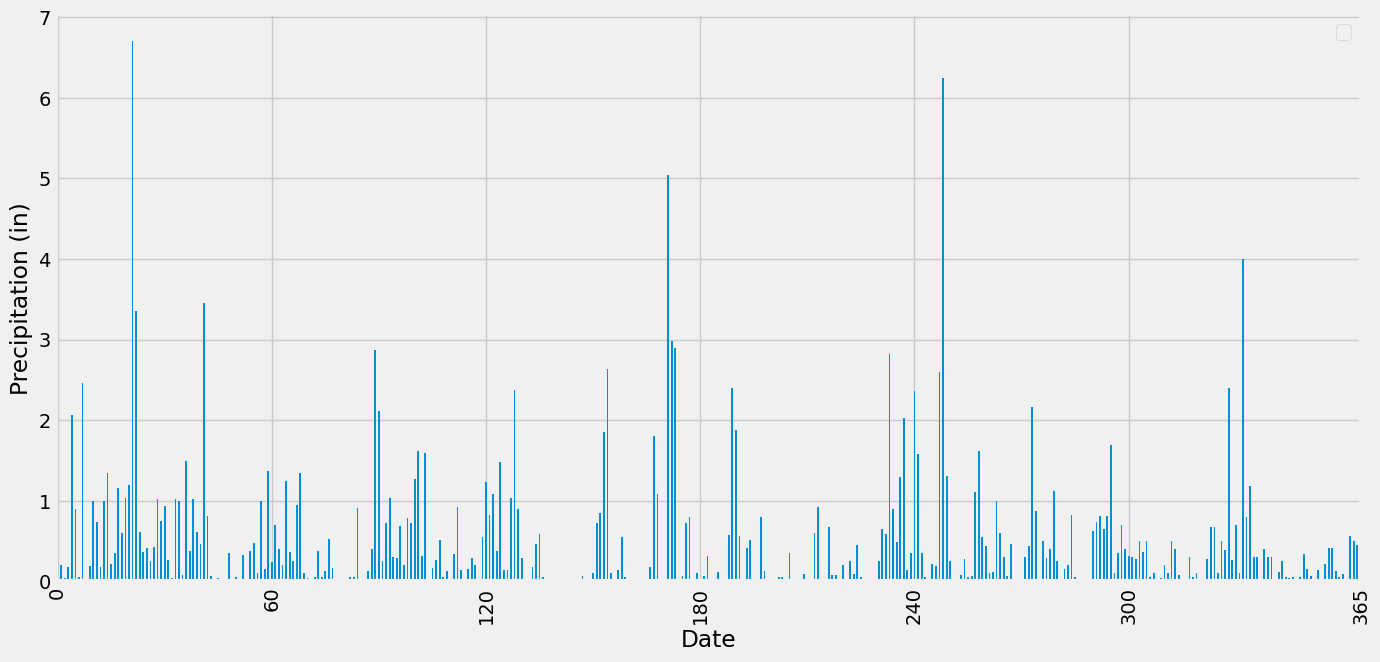

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date 
# Calculate the date one year from the last date in data set.
latest_year = session.query(measurement.date).filter(measurement.date > '2016-08-23').order_by(measurement.date).all()


# Perform a query to retrieve the data and precipitation scores
year_prcp=(session.query(measurement.date,func.max(measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',measurement.date) > '2016-08-23')
                  .group_by(measurement.date)
                  .all())
year_prcp


# Save the query results as a Pandas DataFrame. Explicitly set the column names
#'date' = date and prcp = percitation or rain fall
prcp_df=pd.DataFrame(year_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date',inplace=True)
prcp_df


# Sort the dataframe by date, newest last
prcp_df.sort_values(by='date', ascending=True, inplace=True)

# Create the bar plot- we use 0, 60, and so on to mark days ways from the newest date
prcp_df.plot.bar(xticks=(0,60,120,180,240,300,365))
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.legend('')
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')

plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
# use dates newer then last year
year_prcp_stats=(session.query(measurement.date, measurement.prcp)
                        .filter(measurement.date > year_ago_date)
                        .all())


year_prcp_stats_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(station).count()
print(total_stations)

9


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#first we set up the query, then use .count to count the measurement.stations, then use
#group by to group the stations, then lastly we order, use desc to get the greatest first
station_activity=(session.query(measurement.station,func.count(measurement.station))
                         .group_by(measurement.station)
                         .order_by(func.count(measurement.station).desc())
                         .all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#internet said to use tobs, not sure why or what tobs is 
tobs=[func.min(measurement.tobs), 
             func.max(measurement.tobs), 
             func.avg(measurement.tobs)]
# we want USC00519281 station so we set it == USC00519281 to only get USC00519281
most_active_st=(session.query(*tobs)
                       .filter(measurement.station=='USC00519281')
                       .all())
most_active_st



[(54.0, 85.0, 71.66378066378067)]

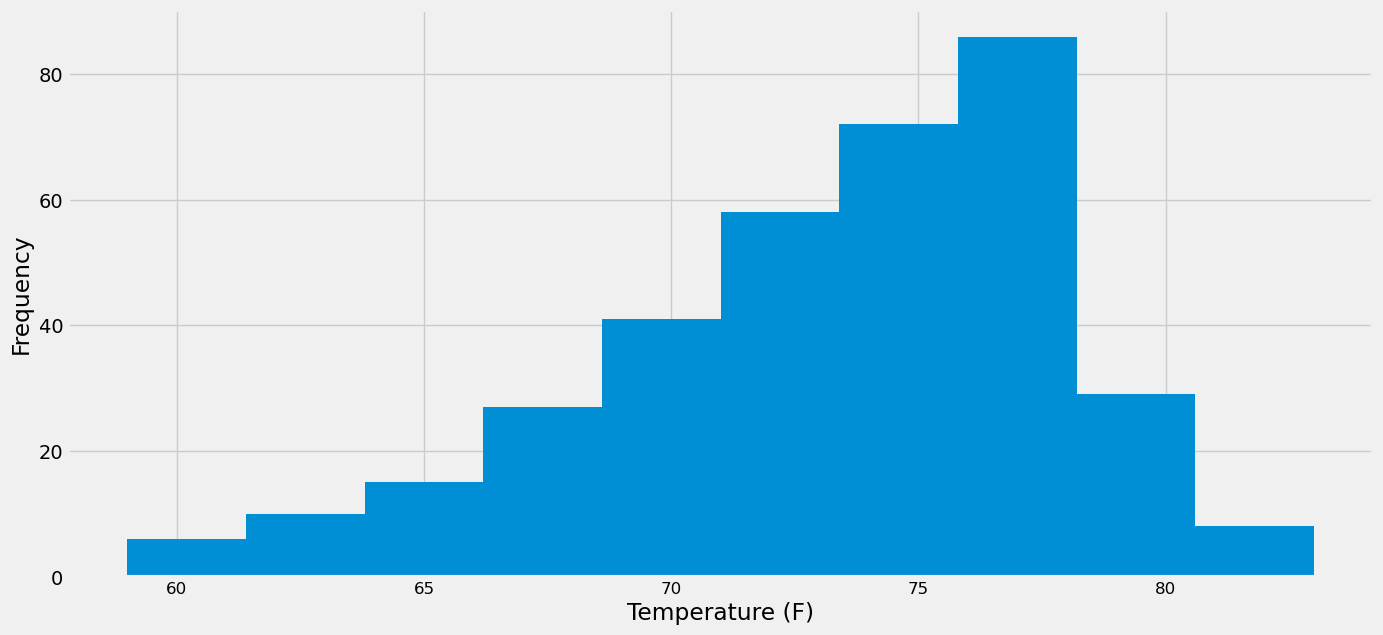

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# we create a seesion find the date newer then the set date, AND then find the station USC00519281
year_tobs=(session.query(measurement.date,(measurement.tobs))
                  .filter(func.strftime(measurement.date) > year_ago_date)
                  .filter(measurement.station=='USC00519281')
                  .all())
year_tobs
tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)

#plot histogram of the tobs, this is the newer dates and station USC00519281
plt.hist(tobs_df['tobs'])


plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks()

plt.show()

# Close Session

In [19]:
# Close Session
session.close()